In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hremployeeattrition/HR_Employee_Attrition_Data (1).csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%config Completer.use_jedi = False

In [3]:
df = pd.read_csv('../input/hremployeeattrition/HR_Employee_Attrition_Data (1).csv')

In [4]:
df.shape

(2940, 35)

In [5]:
################################
### dropping duplicates
df = df.drop_duplicates()


In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2935    False
2936    False
2937    False
2938    False
2939    False
Length: 2940, dtype: bool

In [7]:
##############################
### Shape after deleting duplicates
df.shape

(2940, 35)

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [9]:
#dropping Employee Number column
df.drop(labels= 'EmployeeNumber', inplace=True, axis = 1)

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,1.102658,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
#these are the right skewed variable ...What to do about them????
#  Distance from home (right skewed), stock option level(right skewed), years at company (right skewed), 
# JobLevel (right skewed)', 'PercentSalaryHike'(right skewed)


In [12]:
#checking for imbalanced dataset
df['Attrition'].value_counts()

#we have an imbalanced dataset.

No     2466
Yes     474
Name: Attrition, dtype: int64

## checking the distribution of different variables

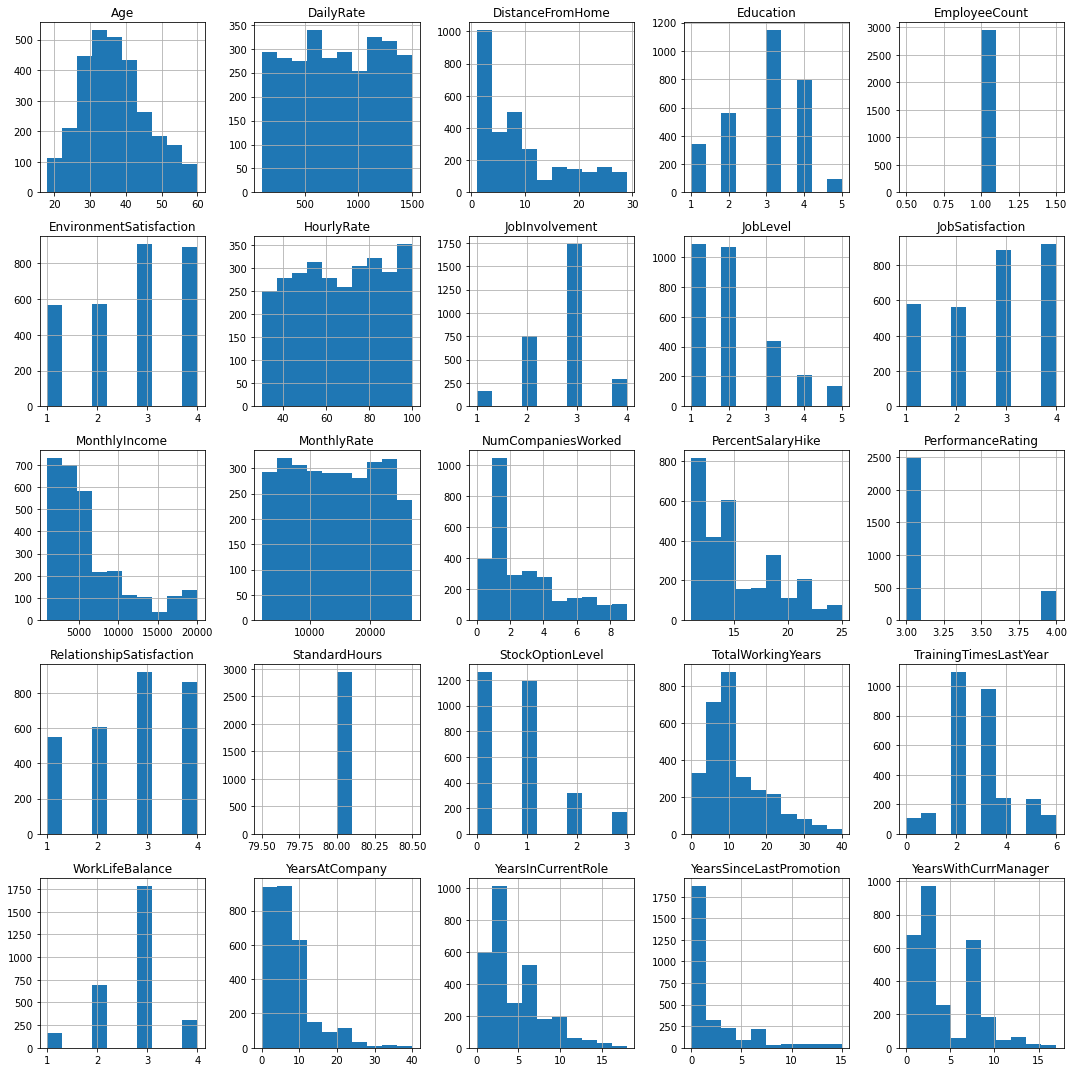

In [13]:
df.hist(figsize = (15,15))
plt.tight_layout()
plt.show()

## Create target feature

In [14]:
df['target'] = np.where(df['Attrition']=='Yes', 1, 0)

In [15]:
#since target is created correctly we can now drop the attrition column
df.drop(labels='Attrition', axis = 1, inplace = True)

## Defining target and independent feature

In [16]:
Y = df[['target']]
X = df.drop(['target'], axis = 1)

## Get attrition (event) rate

In [17]:
Y.mean()

#this basically says that attrition rate is 16% or we can say that out of 100employees 16 are gong for attrition
#this can also be verified by the percentage of zero in Y i.e.,(474/2940)  in this case..

target    0.161224
dtype: float64

## split features into Numerical and Categorical

In [18]:
num = X.select_dtypes(include = 'number')
char = X.select_dtypes(include = 'object')

In [19]:
# check for how many unique values each column has
def unique_levels(X):
    X = X.value_counts().count()
    return X

df_value_counts = pd.DataFrame(num.apply(lambda X: unique_levels(X)))

In [20]:
df_value_counts.columns = ['feature_levels']
df_value_counts

,feature_levels
Age,43
DailyRate,886
DistanceFromHome,29
Education,5
EmployeeCount,1
EnvironmentSatisfaction,4
HourlyRate,71
JobInvolvement,4
JobLevel,5
JobSatisfaction,4


In [21]:
df_value_counts.shape

(25, 1)

In [22]:
slice1 = df_value_counts.loc[df_value_counts['feature_levels']<=15]
cat_list = slice1.index
cat = num.loc[:, cat_list]
cat.dtypes

Education                   int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
dtype: object

In [23]:
cat.shape

(2940, 14)

In [24]:
slice2 = df_value_counts.loc[df_value_counts['feature_levels']>15]
num_list = slice2.index
num = num.loc[:, num_list]
num.dtypes

Age                        int64
DailyRate                  int64
DistanceFromHome           int64
HourlyRate                 int64
MonthlyIncome              int64
MonthlyRate                int64
TotalWorkingYears          int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64
dtype: object

In [25]:
num.shape

(2940, 11)

14+11 = 25 total cols are intact

In [26]:
char.shape

(2940, 8)

### concatenating all categorical variables from slice 1 to actual char df whic is containing all the remaining categorical columns 

In [27]:
char = pd.concat([char, cat], axis = 1, join = 'inner')

In [28]:
char.shape

(2940, 22)

In [29]:
num.shape

(2940, 11)

In [30]:
## total cols are 33 now including chars and num (remains intact)

In [31]:
char.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EmployeeCount,...,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,2,1,...,2,4,8,11,3,1,80,0,0,1
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,1,1,...,2,2,1,23,4,4,80,1,3,3
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,2,1,...,1,3,6,15,3,2,80,0,3,3
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,4,1,...,1,3,1,11,3,3,80,0,3,3
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,1,1,...,1,2,9,12,3,4,80,1,3,3


## Outliers Analysis of Numerical Features

In [32]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.90,0.99])

# we can be sure that the outliers will be between 1%tile and min on the lower side
# and 99% and max on the upper side

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,11.279592,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,20.325969,4707.155770,7116.575021,7.779458,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1372.260000,2324.170000,1.000000,0.000000,0.000000,0.000000,0.000000
5%,24.000000,164.000000,1.000000,33.000000,2097.000000,3376.000000,1.000000,1.000000,0.000000,0.000000,0.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8045.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,84.000000,8380.000000,20462.000000,15.000000,9.000000,7.000000,3.000000,7.000000


## Capping and Flooring of outliers

In [33]:
def outlier_cap(x):
    x = x.clip(lower = x.quantile(0.01))
    x = x.clip(upper = x.quantile(0.99))
    return (x)

In [34]:
num = num.apply(lambda x: outlier_cap(x))

In [35]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.90,0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.921871,802.482993,9.192517,65.891156,6503.306156,14312.605544,11.268707,6.980272,4.214966,2.178912,4.102721
std,9.104845,403.191626,8.105485,20.325969,4699.853209,7110.879597,7.709195,6.003879,3.575851,3.187884,3.503121
min,19.000000,117.000000,1.000000,30.000000,1372.260000,2324.170000,1.000000,0.000000,0.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1380.348600,2324.883700,1.000000,0.000000,0.000000,0.000000,0.000000
5%,24.000000,164.000000,1.000000,33.000000,2097.000000,3376.000000,1.000000,1.000000,0.000000,0.000000,0.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8045.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,84.000000,8380.000000,20462.000000,15.000000,9.000000,7.000000,3.000000,7.000000


## Missing Values

In [36]:
#num.isnull().sum()/num.isnull().count()
num.isnull().mean()

Age                        0.0
DailyRate                  0.0
DistanceFromHome           0.0
HourlyRate                 0.0
MonthlyIncome              0.0
MonthlyRate                0.0
TotalWorkingYears          0.0
YearsAtCompany             0.0
YearsInCurrentRole         0.0
YearsSinceLastPromotion    0.0
YearsWithCurrManager       0.0
dtype: float64

In [37]:
char.isnull().mean()

BusinessTravel              0.0
Department                  0.0
EducationField              0.0
Gender                      0.0
JobRole                     0.0
MaritalStatus               0.0
Over18                      0.0
OverTime                    0.0
Education                   0.0
EmployeeCount               0.0
EnvironmentSatisfaction     0.0
JobInvolvement              0.0
JobLevel                    0.0
JobSatisfaction             0.0
NumCompaniesWorked          0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
dtype: float64

## Duplicate values check

In [38]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2935     True
2936     True
2937     True
2938     True
2939     True
Length: 2940, dtype: bool

## Feature Selection - Numerical Features

### Part 1: Remove Features with Zero Variance

In [39]:
from sklearn.feature_selection import VarianceThreshold
varselector = VarianceThreshold(threshold = 0)
varselector.fit_transform(num)

#get column indices to keep and create new df with those columns only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [40]:
num_1.iloc[0]

Age                           41.0
DailyRate                   1102.0
DistanceFromHome               1.0
HourlyRate                    94.0
MonthlyIncome               5993.0
MonthlyRate                19479.0
TotalWorkingYears              8.0
YearsAtCompany                 6.0
YearsInCurrentRole             4.0
YearsSinceLastPromotion        0.0
YearsWithCurrManager           5.0
Name: 0, dtype: float64

## Part 2: Bivariate Analysis (Feature Discretization)

In [41]:
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num), index=num.index, columns = num.columns).add_suffix('_Rank')
num_binned.tail()

,Age_Rank,DailyRate_Rank,DistanceFromHome_Rank,HourlyRate_Rank,MonthlyIncome_Rank,MonthlyRate_Rank,TotalWorkingYears_Rank,YearsAtCompany_Rank,YearsInCurrentRole_Rank,YearsSinceLastPromotion_Rank,YearsWithCurrManager_Rank
2935,5.0,5.0,8.0,1.0,1.0,4.0,7.0,4.0,2.0,0.0,3.0
2936,6.0,3.0,3.0,1.0,8.0,7.0,4.0,5.0,5.0,1.0,5.0
2937,1.0,0.0,2.0,8.0,6.0,1.0,2.0,4.0,2.0,0.0,3.0
2938,8.0,6.0,1.0,4.0,5.0,4.0,7.0,6.0,4.0,0.0,5.0
2939,4.0,3.0,4.0,7.0,4.0,3.0,2.0,3.0,3.0,1.0,2.0


In [42]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

X_bin_combined = pd.concat([Y,num_binned], axis = 1, join = 'inner')

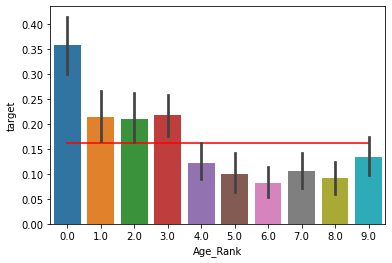

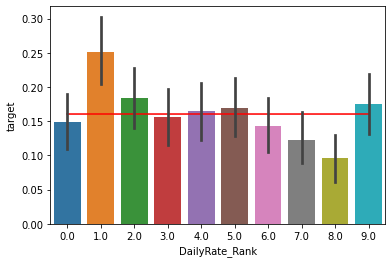

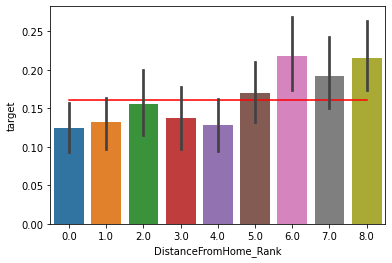

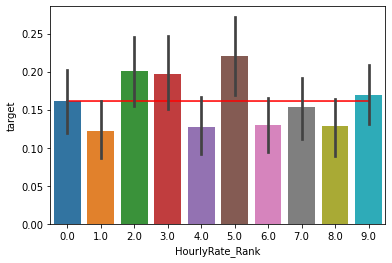

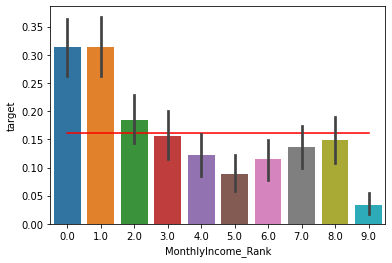

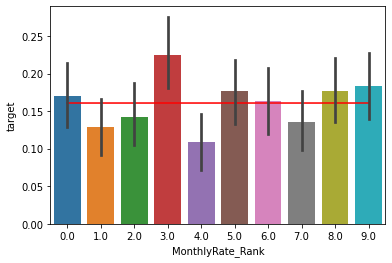

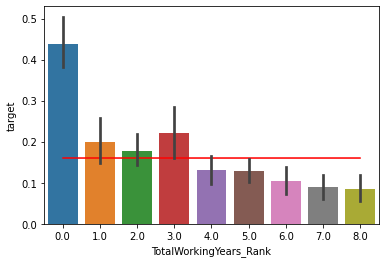

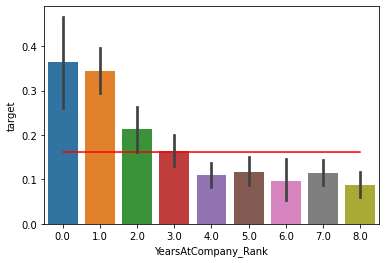

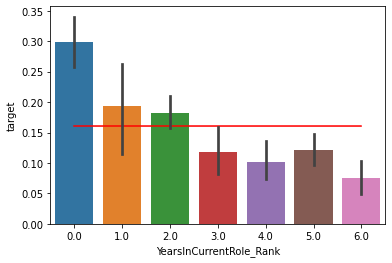

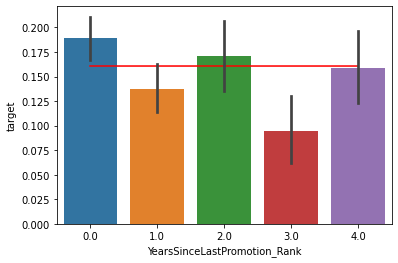

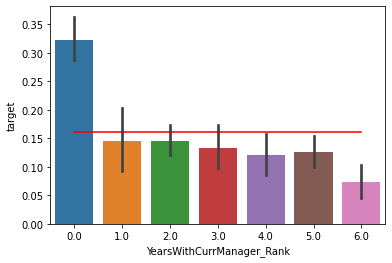

In [43]:
from numpy import mean
for col in num_binned.columns:
    plt.figure()
    sns.lineplot(x=col, y = X_bin_combined['target'].mean(), data=X_bin_combined, color='red')
    sns.barplot(x=col, y='target', data=X_bin_combined, estimator = mean)
plt.show()

In [44]:
#dropping unnecessary columns based on the graph above
num_varlist = ['DailyRate', 'HourlyRate', 'MonthlyRate', 'YearsSinceLastPromotion']
num_1 = num_1.drop(num_varlist, axis=1)

In [45]:
num_1.dtypes

Age                     float64
DistanceFromHome          int64
MonthlyIncome           float64
TotalWorkingYears       float64
YearsAtCompany          float64
YearsInCurrentRole      float64
YearsWithCurrManager    float64
dtype: object

## Part 2 - Select K Best

In [46]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=4)
selector.fit_transform(num_1, Y)

#get columns to create new df with them only
cols = selector.get_support(indices=True)
select_features_df_num = num_1.iloc[:,cols]


In [47]:
select_features_df_num.dtypes

MonthlyIncome         float64
TotalWorkingYears     float64
YearsAtCompany        float64
YearsInCurrentRole    float64
dtype: object

## Feature Selection - Categorical Features

In [48]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
char_unique_levels=pd.DataFrame(char.apply(lambda x : unique_levels(x))) 

In [49]:
char_unique_levels.columns = ['feature_levels']
slice1 = char_unique_levels.loc[char_unique_levels['feature_levels']>1]
cat_list = slice1.index
char = char.loc[:,cat_list]

## Part 1 - Bi Variate Analysis

In [50]:
X_char_merged = pd.concat([Y,char], axis=1, join='inner')

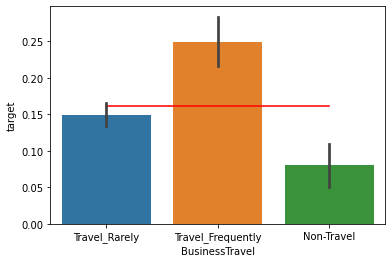

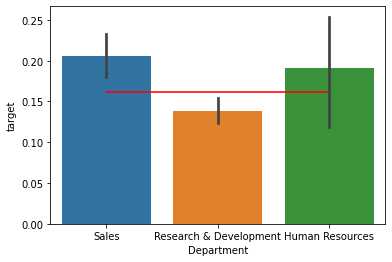

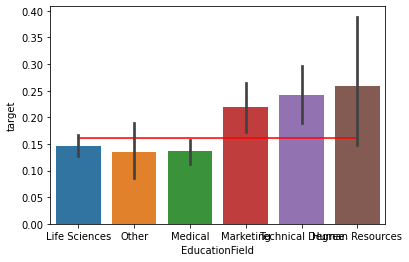

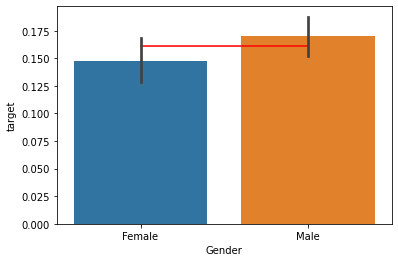

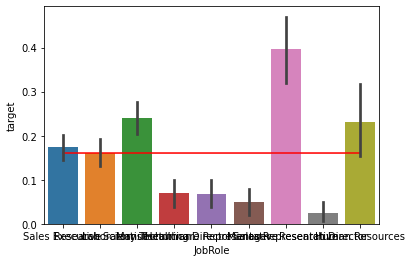

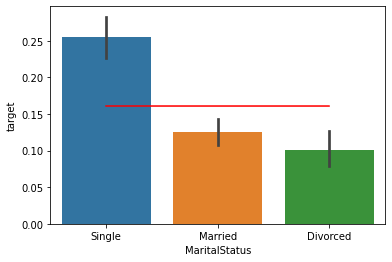

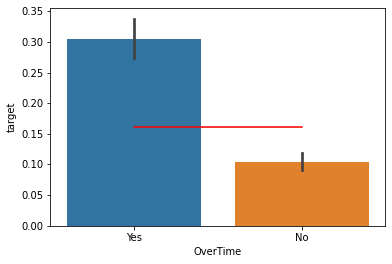

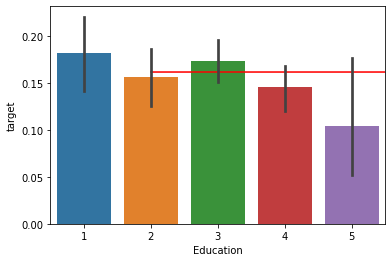

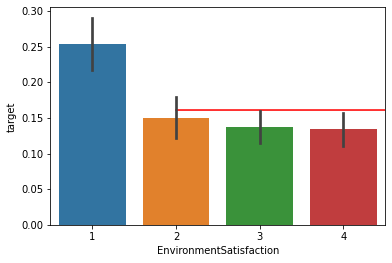

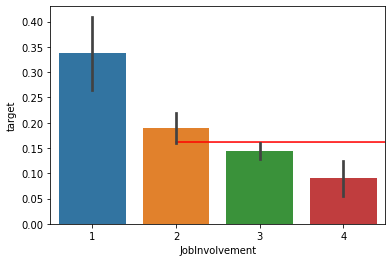

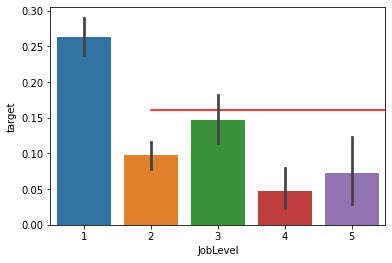

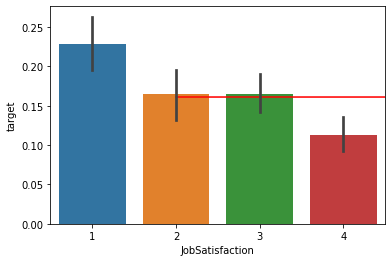

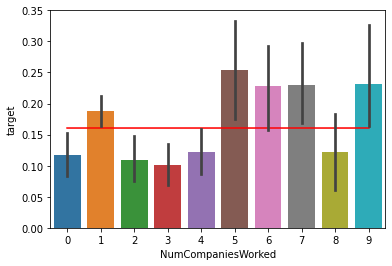

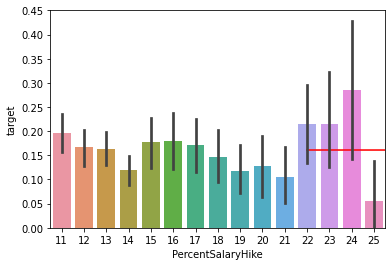

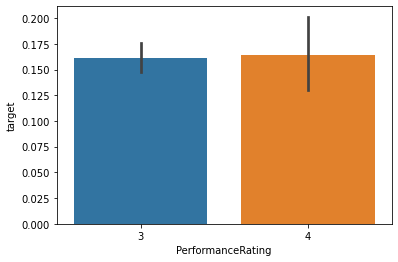

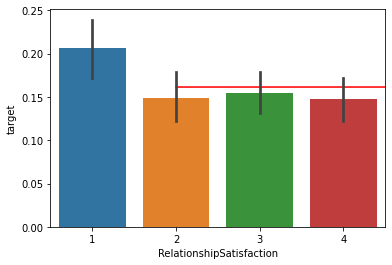

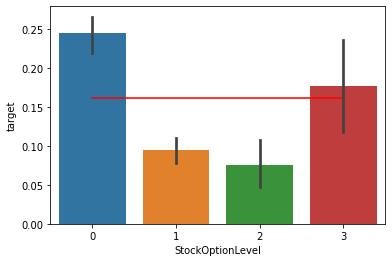

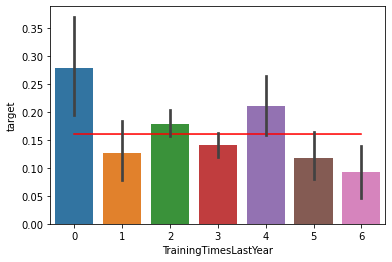

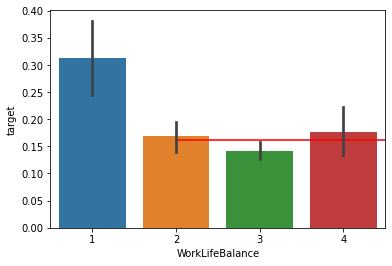

In [51]:
for col in char.columns:
    plt.figure()
    sns.lineplot(x=col, y = X_char_merged['target'].mean(), data=X_char_merged, color='red')
    sns.barplot(x=col, y='target', data = X_char_merged, estimator=mean)
plt.show()

In [52]:
charlist = ['Gender', 'Education', 'PerformanceRating']
char_1 = char.drop(charlist, axis=1)

In [53]:
char_1.dtypes

BusinessTravel              object
Department                  object
EducationField              object
JobRole                     object
MaritalStatus               object
OverTime                    object
EnvironmentSatisfaction      int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
dtype: object

In [54]:
#converting columns which were added from num df to object so that we can one hot encode them

char_1['EnvironmentSatisfaction']=char_1['EnvironmentSatisfaction'].astype('object')
char_1['JobInvolvement']=char_1['JobInvolvement'].astype('object')
char_1['JobLevel']=char_1['JobLevel'].astype('object')
char_1['JobSatisfaction']=char_1['JobSatisfaction'].astype('object')
char_1['NumCompaniesWorked']=char_1['NumCompaniesWorked'].astype('object')
char_1['PercentSalaryHike']=char_1['PercentSalaryHike'].astype('object')
char_1['RelationshipSatisfaction']=char_1['RelationshipSatisfaction'].astype('object')
char_1['StockOptionLevel']=char_1['StockOptionLevel'].astype('object')
char_1['TrainingTimesLastYear']=char_1['TrainingTimesLastYear'].astype('object')
char_1['WorkLifeBalance']=char_1['WorkLifeBalance'].astype('object')

In [55]:
char_1.dtypes

BusinessTravel              object
Department                  object
EducationField              object
JobRole                     object
MaritalStatus               object
OverTime                    object
EnvironmentSatisfaction     object
JobInvolvement              object
JobLevel                    object
JobSatisfaction             object
NumCompaniesWorked          object
PercentSalaryHike           object
RelationshipSatisfaction    object
StockOptionLevel            object
TrainingTimesLastYear       object
WorkLifeBalance             object
dtype: object

In [56]:
#create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char_1, drop_first = True)
X_char_dum.shape

(2940, 71)

In [57]:
X_char_dum.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,...,StockOptionLevel_3,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Part 2 -  Select K Best

In [58]:
#select KBest for categorical features

from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=60)
selector.fit_transform(X_char_dum, Y)

#get columns to create new df with them only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]


## Creating the Master Feature Set for Model Development

In [59]:
X_all = pd.concat([select_features_df_char, select_features_df_num], axis=1, join='inner')

In [60]:
X_all.shape

(2940, 64)

In [61]:
Y.shape

(2940, 1)

## Train Test Split

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.3, random_state=60)

In [63]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Attrition Rate in Training Data",y_train.mean())
print("Attrition Rate in Testing Data",y_test.mean())

Shape of Training Data (2058, 64)
Shape of Testing Data (882, 64)
Attrition Rate in Training Data target    0.160836
dtype: float64
Attrition Rate in Testing Data target    0.162132
dtype: float64


## Building Models

In [64]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Ensemble Methods - Random Forest (With Bagging)
# SVM classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 20)

In [66]:
np.random.seed(44)

from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3,4,5,8,7,10], 'min_samples_split': [10,20,30,50,120,180,200,250]}
tree_grid = GridSearchCV(dtree, param_grid = param_dist, cv = 10, n_jobs = -1 )
tree_grid.fit(X_train, y_train)
print('Best Parameters using Grid Search: \n', tree_grid.best_params_)

Best Parameters using Grid Search: 
 {'max_depth': 8, 'min_samples_split': 10}


In [67]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 20, max_depth = 8, min_samples_split=10)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=10, random_state=20)

In [68]:
#building a random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'gini', random_state = 20)

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
param_dist = {'max_depth': [3,4,5,8,7,10], 'min_samples_split': [10,20,30,50,120,180,200,250],
              'n_estimators': [100,150]}
rf_grid = GridSearchCV(rf, param_grid = param_dist, cv = 10, n_jobs = -1 )
rf_grid.fit(X_train, y_train)
print('Best Parameters using Grid Search: \n', rf_grid.best_params_)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

Best Parameters using Grid Search: 
 {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


Best Parameters using Grid Search: 
 {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}

In [71]:
rf = RandomForestClassifier(criterion='gini',random_state=20,max_depth=10,min_samples_split=10, n_estimators= 100)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=20)

In [72]:
# Model Evaluation
y_pred_tree = dtree.predict(X_test) 
y_pred_rf = rf.predict(X_test) 

In [73]:
# metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [74]:
# decision tree Confusion matrix
confusion_matrix(y_test, y_pred_tree)

array([[704,  35],
       [ 70,  73]])

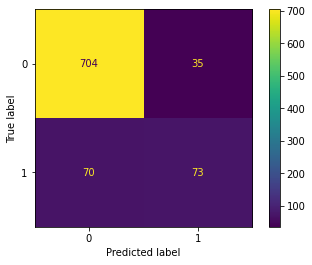

In [75]:
metrics.plot_confusion_matrix(dtree, X_test, y_test)

In [76]:
print('Decision Tree Metrics ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Decision Tree Metrics 
Accuracy: 0.8809523809523809
Precision 0.6759259259259259
Recall 0.5104895104895105
f1_score 0.5816733067729084


In [77]:
#Random Forest Confusion Matrix
confusion_matrix(y_test, y_pred_rf)

array([[739,   0],
       [106,  37]])

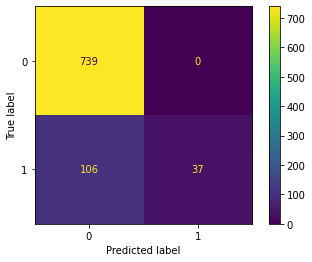

In [78]:
metrics.plot_confusion_matrix(rf, X_test,y_test)

In [79]:
print('Random Forest Metrics')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rf))
print('Precision:', metrics.precision_score(y_test, y_pred_rf))
print('Recall:', metrics.recall_score(y_test, y_pred_rf))
print('f1_score:', metrics.f1_score(y_test, y_pred_rf))


Random Forest Metrics
Accuracy: 0.8798185941043084
Precision: 1.0
Recall: 0.25874125874125875
f1_score: 0.41111111111111115


## Feature Importance List

In [80]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                  index = X_train.columns,
                                  columns=['importance']). sort_values('importance', ascending=False) 
feature_importances

,importance
MonthlyIncome,0.135253
TotalWorkingYears,0.097112
OverTime_Yes,0.080727
YearsAtCompany,0.068882
YearsInCurrentRole,0.046984
...,...
JobRole_Research Director,0.002481
PercentSalaryHike_24,0.002006
PercentSalaryHike_21,0.001701
JobLevel_5,0.001627


<AxesSubplot:xlabel='importance'>

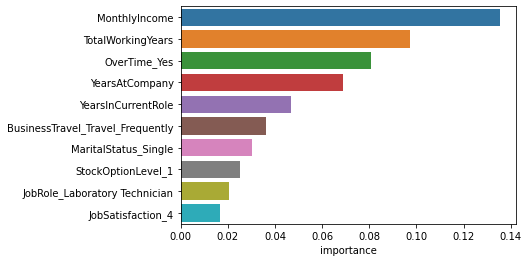

In [81]:
sns.barplot(x = 'importance', y = feature_importances.iloc[:10].index, data = feature_importances.iloc[:10])

## Probability Decile Analysis

In [82]:
y_pred_prob = rf.predict_proba(X_all)[:,1] # here we choose col 1 cause it has prob of attrition data col 0 is not attrition
df['y_pred_p'] = pd.DataFrame(y_pred_prob)
df['P_Rank_rf'] = pd.qcut(df['y_pred_p'].rank(method = 'first').values,10,duplicates='drop').codes+1
rank_df_actuals = df.groupby('P_Rank_rf')['target'].agg(['count', 'mean'])
rank_df_actuals = pd.DataFrame(rank_df_actuals)
rank_df_actuals.rename(columns={'mean': 'Actual_event_rate'}, inplace=True)

sorted_rank_df=rank_df_actuals.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df_actuals['count']*rank_df_actuals['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Lift_over_Avg']=sorted_reindexed['Actual_event_rate']/(max(sorted_reindexed['N_events'].cumsum())/max(sorted_reindexed['count'].cumsum()))
sorted_reindexed


,P_Rank_rf,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Decile,Lift_over_Avg
0,10,294,0.959184,282.0,282.0,0.594937,0.594937,12.0,12.0,0.004866,0.004866,0.5901,1,5.949367
1,9,294,0.503401,148.0,430.0,0.312236,0.907173,146.0,158.0,0.059205,0.064071,0.8431,2,3.122363
2,8,294,0.081633,24.0,454.0,0.050633,0.957806,270.0,428.0,0.109489,0.173560,0.7842,3,0.506329
3,7,294,0.027211,8.0,462.0,0.016878,0.974684,286.0,714.0,0.115977,0.289538,0.6851,4,0.168776
4,6,294,0.020408,6.0,468.0,0.012658,0.987342,288.0,1002.0,0.116788,0.406326,0.5810,5,0.126582
5,5,294,0.006803,2.0,470.0,0.004219,0.991561,292.0,1294.0,0.118410,0.524736,0.4668,6,0.042194
6,4,294,0.000000,0.0,470.0,0.000000,0.991561,294.0,1588.0,0.119221,0.643958,0.3476,7,0.000000
7,3,294,0.006803,2.0,472.0,0.004219,0.995781,292.0,1880.0,0.118410,0.762368,0.2334,8,0.042194
8,2,294,0.000000,0.0,472.0,0.000000,0.995781,294.0,2174.0,0.119221,0.881590,0.1142,9,0.000000
9,1,294,0.006803,2.0,474.0,0.004219,1.000000,292.0,2466.0,0.118410,1.000000,-0.0000,10,0.042194


* Gain Chart
Gain at a given decile level is the ratio of cumulative number of targets (events) up to that decile to the total number of targets (events) in the entire data set

% of targets (events) covered at a given decile level. For example,  80% of targets covered in top 20% of data based on model. In the case of propensity to buy model, we can say we can identify and target 80% of customers who are likely to buy the product by just sending email to 20% of total customers.

* Lift Chart

It measures how much better one can expect to do with the predictive model comparing without a model. It is the ratio of gain % to the random expectation % at a given decile level. The random expectation at the xth decile is x%.

Ex: The Cum Lift of 4.03 for top two deciles, means that when selecting 20% of the records based on the model, one can expect 4.03 times the total number of targets (events) found by randomly selecting 20%-of-file without a model.




[more](https://www.listendata.com/2014/08/excel-template-gain-and-lift-charts.html)

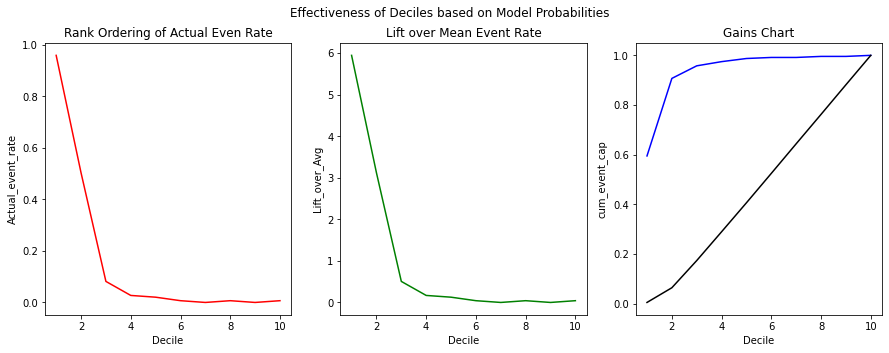

In [83]:
fig, axes = plt.subplots(1, 3, sharex = True, figsize = (15,5))
fig.suptitle('Effectiveness of Deciles based on Model Probabilities')
axes[0].set_title('Rank Ordering of Actual Even Rate')
axes[1].set_title('Lift over Mean Event Rate')
axes[2].set_title('Gains Chart')
sns.lineplot(ax=axes[0], x = 'Decile', y = 'Actual_event_rate', data = sorted_reindexed, color = 'red')
sns.lineplot(ax=axes[1], x = 'Decile', y = 'Lift_over_Avg', data = sorted_reindexed, color = 'green')
sns.lineplot(ax=axes[2], x = 'Decile', y = 'cum_event_cap', data = sorted_reindexed, color = 'blue')
sns.lineplot(ax=axes[2], x = 'Decile', y = 'cum_non_event_cap', data = sorted_reindexed, color = 'black')
plt.show()


#as we can see from the Gains Chart top 3 decile account for nearly 90% of the total events

In [84]:
# Audience
df['Predicted_cancel_Rank']=np.where(df['P_Rank_rf']<8,"Bottom7","Top3")
df.Predicted_cancel_Rank.value_counts()

Bottom7    2058
Top3        882
Name: Predicted_cancel_Rank, dtype: int64

In [85]:
df_top3=df.loc[df['Predicted_cancel_Rank']=='Top3',:]

In [86]:
df_top3.shape

(882, 37)

In [87]:
df_top3['income_RANK']=pd.qcut(df_top3['MonthlyIncome'].rank(method='first').values,10,duplicates='drop').codes+1
df_top3

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,target,y_pred_p,P_Rank_rf,Predicted_cancel_Rank,income_RANK
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,6,4,0,5,1,0.432438,10,Top3,9
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,...,3,0,0,0,0,1,0.669166,10,Top3,2
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,...,3,8,7,3,0,0,0.178037,8,Top3,6
6,59,Travel_Rarely,1324,Research & Development,3,3,Medical,1,3,Female,...,2,1,0,0,0,0,0.339121,9,Top3,5
7,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,4,Male,...,3,1,0,0,0,0,0.275501,9,Top3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,29,Travel_Rarely,1092,Research & Development,1,4,Medical,1,1,Male,...,4,2,2,2,2,1,0.489738,10,Top3,8
2914,56,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,4,Male,...,1,10,9,9,8,1,0.343718,9,Top3,3
2922,50,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2,Male,...,3,6,3,0,1,1,0.296933,9,Top3,9
2931,50,Travel_Rarely,410,Sales,28,3,Marketing,1,4,Male,...,3,3,2,2,0,1,0.263004,9,Top3,10


In [88]:
df_top3.groupby('income_RANK')['MonthlyIncome'].agg(['min','mean','max'])

,min,mean,max
income_RANK,,,
1,1009,1579.179775,2033
2,2033,2142.352273,2272
3,2272,2336.431818,2400
4,2400,2523.602273,2657
5,2657,2748.909091,2871
6,2871,3118.000000,3447
7,3447,3960.988636,4422
8,4422,4958.215909,5617
9,5617,6873.625000,8564


In [89]:
df_top3.MonthlyIncome.mean()

4224.517006802721

In [90]:
df_top3['income_segment']=np.where(df_top3['income_RANK']>=8,"High Income","Low Income")
df_top3.income_segment.value_counts()

Low Income     617
High Income    265
Name: income_segment, dtype: int64

In [91]:
df_top3['tot_work_exp_rank']=pd.qcut(df_top3['TotalWorkingYears'].rank(method='first').values,10,duplicates='drop').codes+1

In [92]:
df_top3.groupby('tot_work_exp_rank')['TotalWorkingYears'].agg(['min','mean','max'])

,min,mean,max
tot_work_exp_rank,,,
1,0,0.752809,1
2,1,1.000000,1
3,1,2.454545,3
4,3,4.295455,5
5,5,5.579545,6
6,6,6.534091,7
7,7,8.000000,9
8,9,9.761364,10
9,10,12.750000,16


In [93]:
df_top3.TotalWorkingYears.mean()

7.331065759637188

In [94]:
df_top3['Work_Exp_Segment']=np.where(df_top3['tot_work_exp_rank']>=7,"High Work Exp","Low Work Exp")
df_top3.Work_Exp_Segment.value_counts()

Low Work Exp     529
High Work Exp    353
Name: Work_Exp_Segment, dtype: int64

In [95]:
pd.crosstab(index=df_top3['Work_Exp_Segment'], columns=df_top3['income_segment'],values=df_top3['TotalWorkingYears'],aggfunc='count')

income_segment,High Income,Low Income
Work_Exp_Segment,,
High Work Exp,211,142
Low Work Exp,54,475


In [96]:
pd.crosstab(index=df_top3['Work_Exp_Segment'], columns=df_top3['income_segment'],values=df_top3['y_pred_p'],aggfunc='mean')

income_segment,High Income,Low Income
Work_Exp_Segment,,
High Work Exp,0.322083,0.314932
Low Work Exp,0.337217,0.389678
